In [4]:
import numpy as np

data = np.load("./../data/collected_data.npy", allow_pickle=True)


In [5]:
len(data)

48

In [14]:
data[0].shape

(1000, 5)

In [15]:
data[0][0]

array([array([[ 0,  0,  0, ...,  0,  0,  0],
              [ 0,  0,  0, ...,  0,  0,  0],
              [ 0,  0,  0, ...,  0,  0,  0],
              ...,
              [ 1, 22, 16, ...,  0,  0,  0],
              [ 0,  0,  0, ...,  0,  0,  0],
              [ 0,  1,  1, ...,  0,  0,  0]], dtype=uint8),
       array([-0.7841145 ,  0.33845174,  0.4707939 ], dtype=float32),
       6.372491909385114, False, False], dtype=object)

In [16]:
# Take first episode's data
episode_data = data[10]

# Extract the states (images)
states = [x[0] for x in episode_data]

# Take some samples (e.g., first 5)
sample_states = states[0:999]


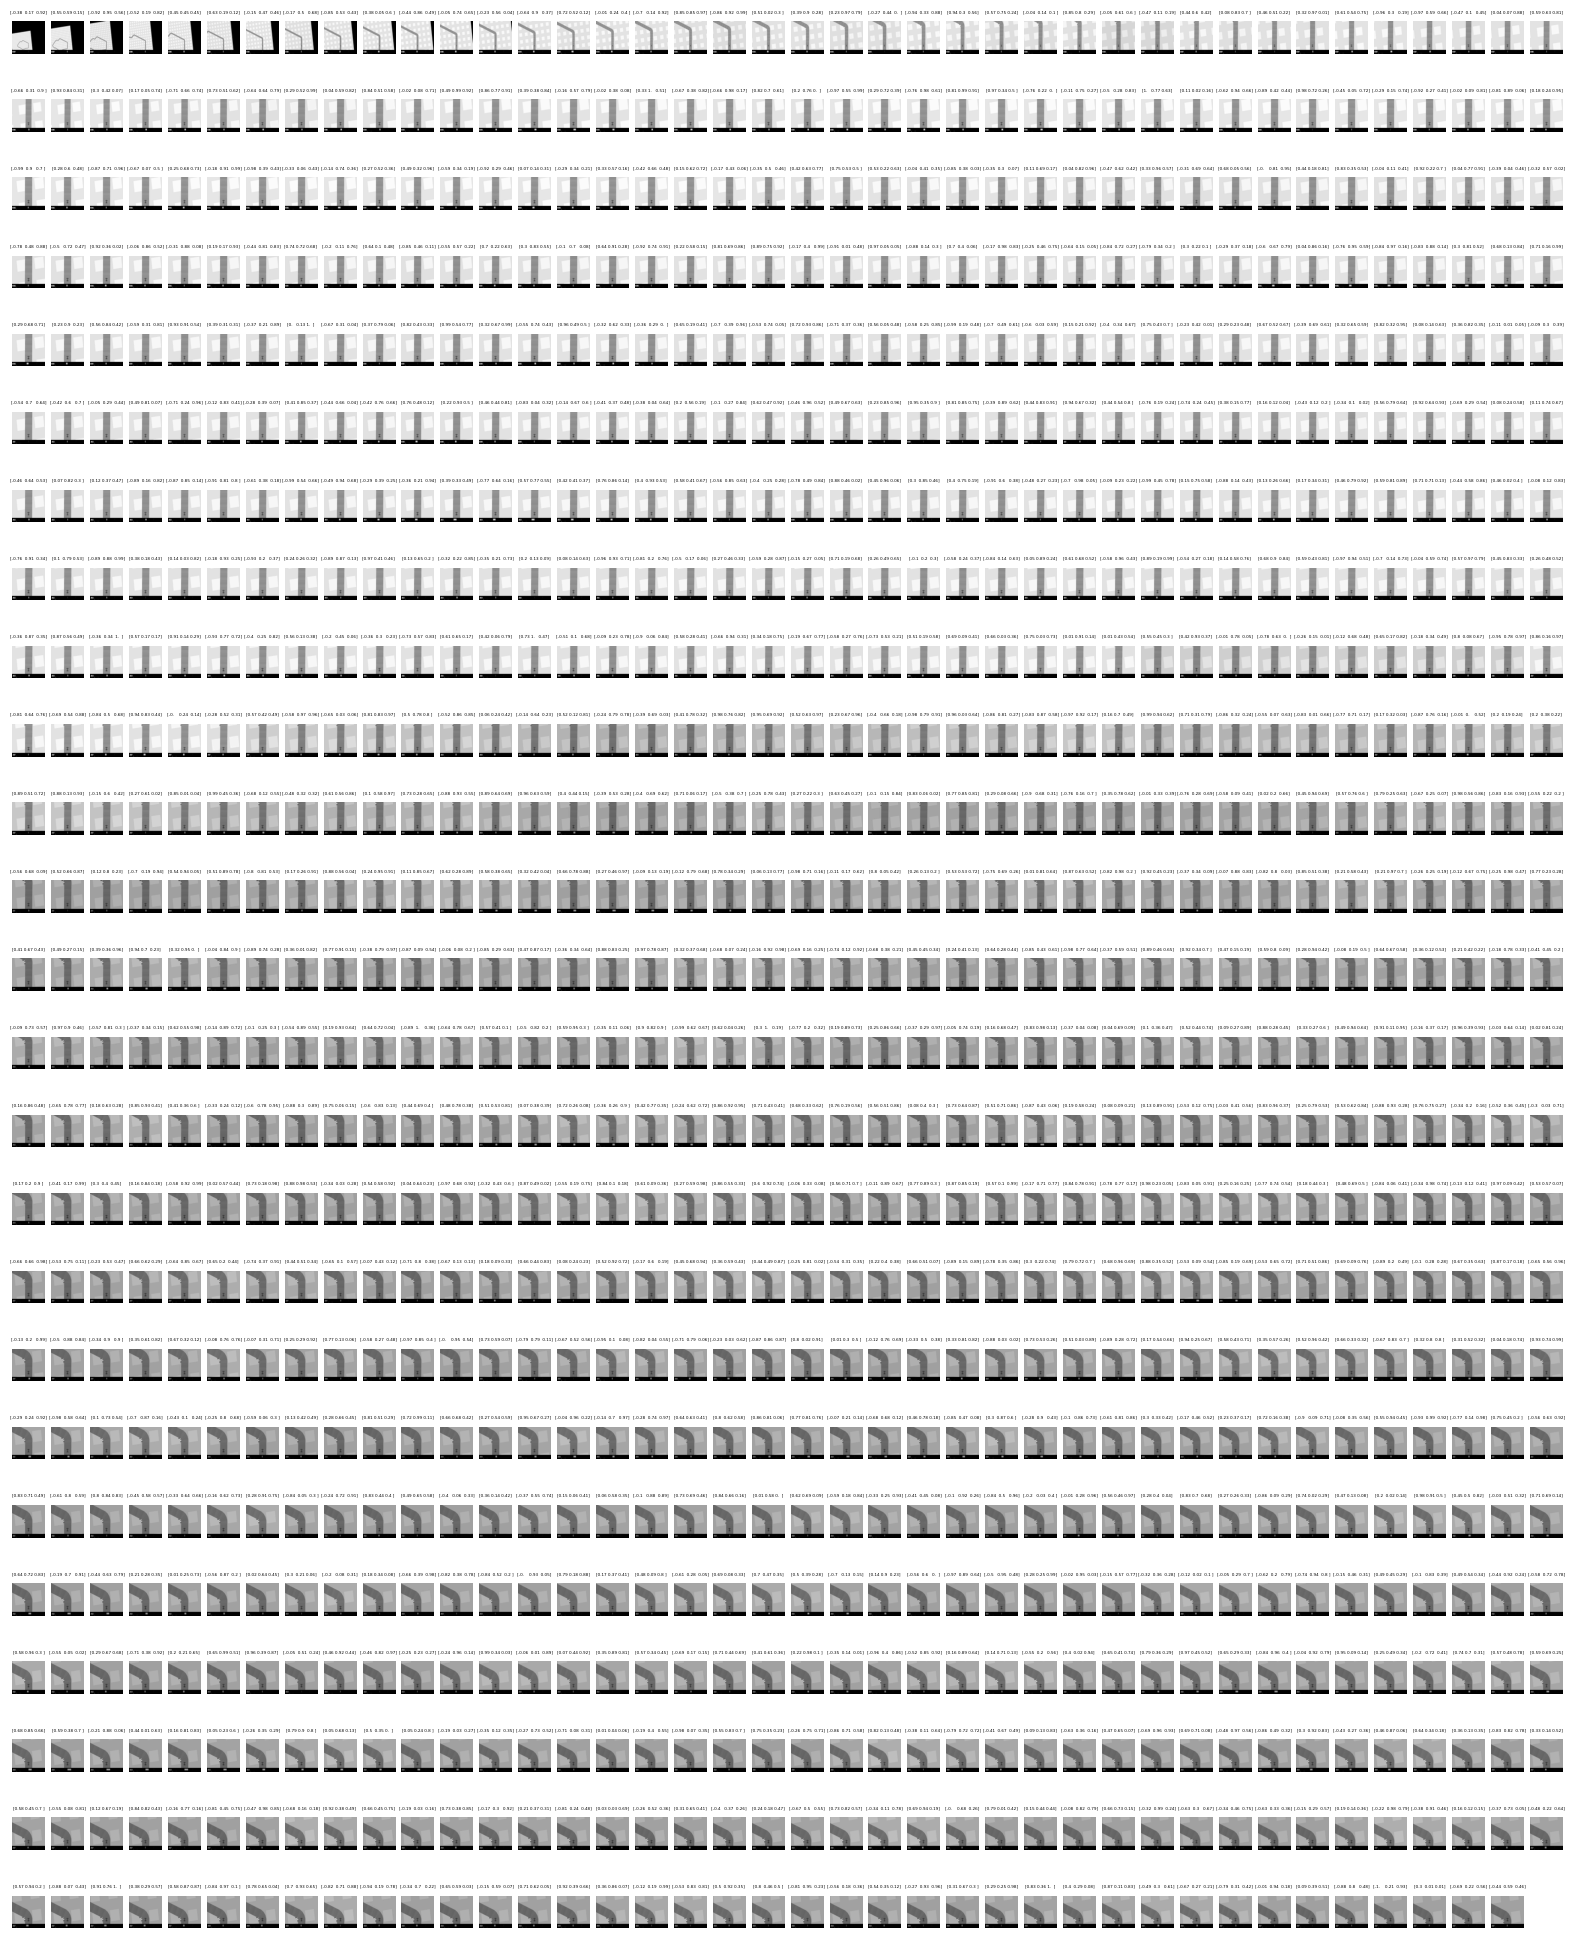

In [17]:
import matplotlib.pyplot as plt

cols = 40
for idx, image in enumerate(sample_states):
    # plot with 10 columns and number of rows based on number of samples
    plt.subplot(int(np.ceil(len(sample_states)/cols)), cols, idx+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    # add some vertical space between the images
    plt.subplots_adjust(hspace=0.6)
    # label the axes with the action
    plt.title(np.round(episode_data[idx][1],2), fontsize=3)
    #make the length of the figure relative to the number of samples
    plt.gcf().set_size_inches(20, len(sample_states)/cols)
    

plt.show()


In [28]:
import pandas as pd

flattened_data = []
episode_count = 1

for episode in data:
    for step in episode:
        # Convert step to list and prepend episode_count
        step_list = [episode_count] + list(step)
        flattened_data.append(step_list)
    episode_count += 1

df = pd.DataFrame(
    flattened_data,
    columns=["Episode", "State", "Action", "Reward", "Done", "Truncated"]
)




In [29]:
print(df.head())
print(df.describe())


   Episode                                              State  \
0        1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1        1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2        1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3,...   
3        1  [[160, 160, 160, 159, 160, 160, 159, 159, 160,...   
4        1  [[159, 163, 175, 175, 165, 159, 168, 177, 173,...   

                                  Action    Reward   Done  Truncated  
0    [-0.7841145, 0.33845174, 0.4707939]  6.372492  False      False  
1  [-0.38248476, 0.30377993, 0.21854539] -0.100000  False      False  
2  [-0.020910177, 0.93864715, 0.6903198] -0.100000  False      False  
3   [-0.49964038, 0.3411706, 0.33716467] -0.100000  False      False  
4     [0.45254418, 0.4954021, 0.6573892] -0.100000  False      False  
            Episode        Reward
count  48000.000000  48000.000000
mean      24.500000     -0.032982
std       13.853543      0.496642
min        1.000000     -0.100000
25%       12.

c:\Users\aswegen.d\Dropbox\0_Buas\BuasDev\World Models\worldmodels1\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswegen.d\Dropbox\0_Buas\BuasDev\World Models\worldmodels1\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


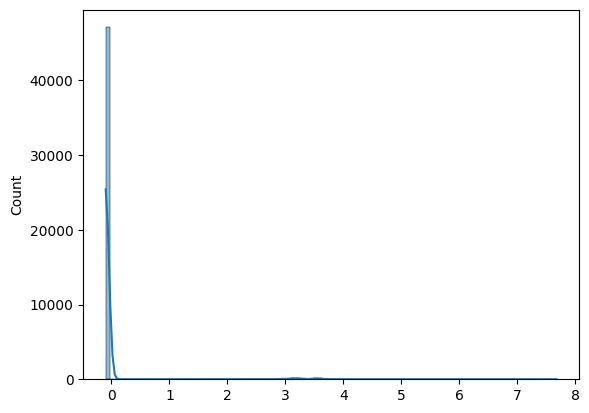

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Reward'].values, bins=100, kde=True)
plt.show()
